### imports

In [1]:
import copy
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib.ticker import MaxNLocator
import seaborn as sns

warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

### Configs

In [2]:
data_path = r'..\data\dados_after_model.csv'

# Dicionário para o enconding estadual
uf_dict = {'SP':28, 'RJ':27, 'MG':26, 'RS':25, 'PR':24, 'SC':23, 'DF':22, 'BA':21, 'GO':20, 'PE':19,
           'ES':18, 'PA':17, 'CE':16, 'MT':15, 'AM':14, 'MA':13, 'MS':12, 'RN':11, 'PB':10, 'AL': 9,
           'RO': 8, 'SE': 7, 'PI': 6, 'TO': 5, 'AP': 4, 'AC': 3, 'RR': 2, 'DE':1}

### Análise dos grupos classificados

In [3]:
df = pd.read_csv(data_path); df.head()

,Município,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000",...,"População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000",Estado,Grupo
0,Abadia de Goiás (GO),136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,0.53,...,1872,2433,121,227,4227,4971,3096,1875,GO,Grupo 1
1,Abadia dos Dourados (MG),897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,0.52,...,3308,3781,354,459,6492,6446,3927,2519,MG,Grupo 1
2,Abadiânia (GO),1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,0.56,...,4241,5918,446,686,9402,11452,7206,4246,GO,Grupo 1
3,Abaetetuba (PA),1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,0.59,...,33554,44897,3792,4688,99989,119152,70843,48309,PA,Grupo 1
4,Abaeté (MG),1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,0.58,...,10163,12406,1084,1595,20689,22360,19022,3338,MG,Grupo 1


#### Importância das variáveis

Para analisar quais características são determinantes para seleção dos grupos vamos "transformar" o problema em um problema de aprendizado supervisionado de multiclassificação, inspirado no artigo científico: A Supervised Methodology to Measure the Variables Contribution to a Clustering

In [4]:
# Preparando os dados

dados=copy.deepcopy(df)
dados.drop('Município',axis=1, inplace=True)
dados['Estado'] = dados['Estado'].apply(lambda x: uf_dict[x])
dados['Grupo'] = dados['Grupo'].astype('category')

In [5]:
# Separando o array em componentes de input e output

array = dados.values 
X = array[:,0:-1]
Y = array[:,-1]

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier(random_state=15)
modelo.fit(X, Y)

# Print dos Resultados
res = [[round(modelo.feature_importances_[i],4),dados.columns[i]] for i in range(len(dados.columns)-1)]
res.sort(); res

[[0.0055, 'Taxa de fecundidade total, 2000'],
 [0.0057, 'Índice de Gini, 2000'],
 [0.0058, 'Estado'],
 [0.0061, 'Esperança de vida ao nascer, 2000'],
 [0.0061, 'Intensidade da pobreza, 2000'],
 [0.0062, 'Área (km²)'],
 [0.0064, 'Mortalidade até um ano de idade, 2000'],
 [0.0064, 'Taxa bruta de freqüência à escola, 2000'],
 [0.0068, 'Intensidade da indigência, 2000'],
 [0.0084, 'Índice de Desenvolvimento Humano Municipal, 2000'],
 [0.0088, 'Percentual de pessoas de 25 anos ou mais analfabetas, 2000'],
 [0.0097, 'População rural, 2000'],
 [0.0105, 'Distância à capital (km)'],
 [0.0121, 'Taxa de alfabetização, 2000'],
 [0.0132, 'Renda per Capita, 2000'],
 [0.0309, 'Densidade demográfica, 2000'],
 [0.0398,
  'Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000'],
 [0.0676, 'População de 65 anos ou mais de idade, 1991'],
 [0.0794, 'População de 65 anos ou mais de idade, 2000'],
 [0.1156, 'População urbana, 2000'],
 [0.1241, 'População de 25 anos ou mais de idade, 1991'],
 

Os resultados acima representam o índice Gini para cada variável

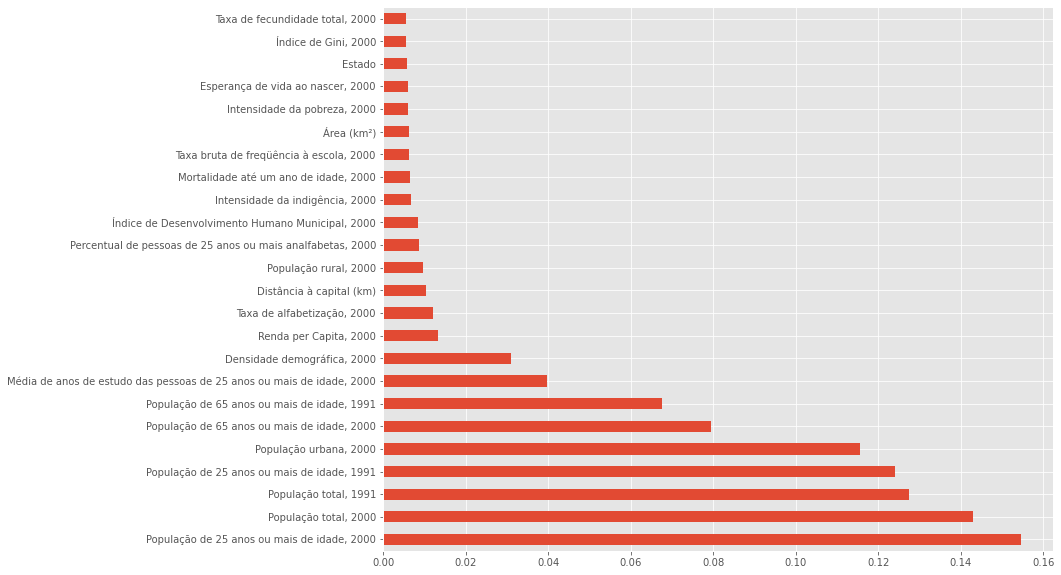

In [6]:
# Plot dos Resultados

res_cols = dados.drop(['Grupo'],axis = 1).columns

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)

feat_importances = pd.Series(modelo.feature_importances_, index=res_cols)
feat_importances.nlargest(36).plot(kind='barh');

A Análise mostra as variáveis mais relevantes na classificação dos grupos.

Visto o exposto acima, para analisar a fundo as características de cada grupo, vamos selecionar as variáveis com índice Gini maior que 0,01 e usá-las para estudar as características principais de cada grupo e também, vamos manter apenas os dados do ano 2000, que retratam um cenário mais próximo da realidade

In [7]:
selected = [x[1] for x in list(filter(lambda c: c[0] >= 0.0097, res))]
selected.insert(0,'Município')
selected.insert(1,'Intensidade da pobreza, 2000')
selected.insert(len(selected),'Grupo')
selected

['Município',
 'Intensidade da pobreza, 2000',
 'População rural, 2000',
 'Distância à capital (km)',
 'Taxa de alfabetização, 2000',
 'Renda per Capita, 2000',
 'Densidade demográfica, 2000',
 'Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000',
 'População de 65 anos ou mais de idade, 1991',
 'População de 65 anos ou mais de idade, 2000',
 'População urbana, 2000',
 'População de 25 anos ou mais de idade, 1991',
 'População total, 1991',
 'População total, 2000',
 'População de 25 anos ou mais de idade, 2000',
 'Grupo']

In [8]:
df = df[selected]
df.drop(['População de 65 anos ou mais de idade, 1991',
         'População de 65 anos ou mais de idade, 1991',
         'População de 25 anos ou mais de idade, 1991',
         'População total, 1991'], axis=1, inplace=True)
df

,Município,"Intensidade da pobreza, 2000","População rural, 2000",Distância à capital (km),"Taxa de alfabetização, 2000","Renda per Capita, 2000","Densidade demográfica, 2000","Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 2000","População urbana, 2000","População total, 2000","População de 25 anos ou mais de idade, 2000",Grupo
0,Abadia de Goiás (GO),34.40,1875,21.414308,88.03,205.27,36.3,4.87,227,3096,4971,2433,Grupo 1
1,Abadia dos Dourados (MG),35.22,2519,390.876513,86.58,196.36,7.2,4.36,459,3927,6446,3781,Grupo 1
2,Abadiânia (GO),40.32,4246,78.641435,82.45,168.31,10.9,4.24,686,7206,11452,5918,Grupo 1
3,Abaetetuba (PA),51.04,48309,51.184552,80.74,102.14,73.8,4.28,4688,70843,119152,44897,Grupo 1
4,Abaeté (MG),31.68,3338,172.311549,87.55,253.68,12.3,4.78,1595,19022,22360,12406,Grupo 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5502,Xique-Xique (BA),61.43,13153,517.242182,70.69,73.31,7.4,3.16,2450,31565,44718,17840,Grupo 1
5503,Zabelê (PB),48.10,667,268.334474,63.05,89.61,12.8,2.89,170,1186,1853,954,Grupo 1
5504,Zacarias (SP),38.00,615,447.390579,86.92,195.16,6.1,4.82,152,1332,1947,1135,Grupo 1
5505,Zé Doca (MA),52.25,17052,186.466943,65.24,77.08,24.1,2.89,2302,29082,46134,17631,Grupo 1


Como os grupos 2 e 3 são compostos por uma cidade apenas, sendo elas São Paulo e Rio de Janeiro, faremos a análise delas separadamente

In [9]:
df_analyses = df[~df['Grupo'].isin(['Grupo 2', 'Grupo 3'])]
df[df['Grupo'].isin(['Grupo 2', 'Grupo 3'])]

,Município,"Intensidade da pobreza, 2000","População rural, 2000",Distância à capital (km),"Taxa de alfabetização, 2000","Renda per Capita, 2000","Densidade demográfica, 2000","Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 2000","População urbana, 2000","População total, 2000","População de 25 anos ou mais de idade, 2000",Grupo
4157,Rio de Janeiro (RJ),46.90,0,0.0,95.59,596.65,4627.9,8.42,534224,5857904,5857904,3511498,Grupo 3
4818,São Paulo (SP),51.19,621065,0.0,95.11,610.04,6808.1,7.81,670780,9813187,10434252,5825893,Grupo 2


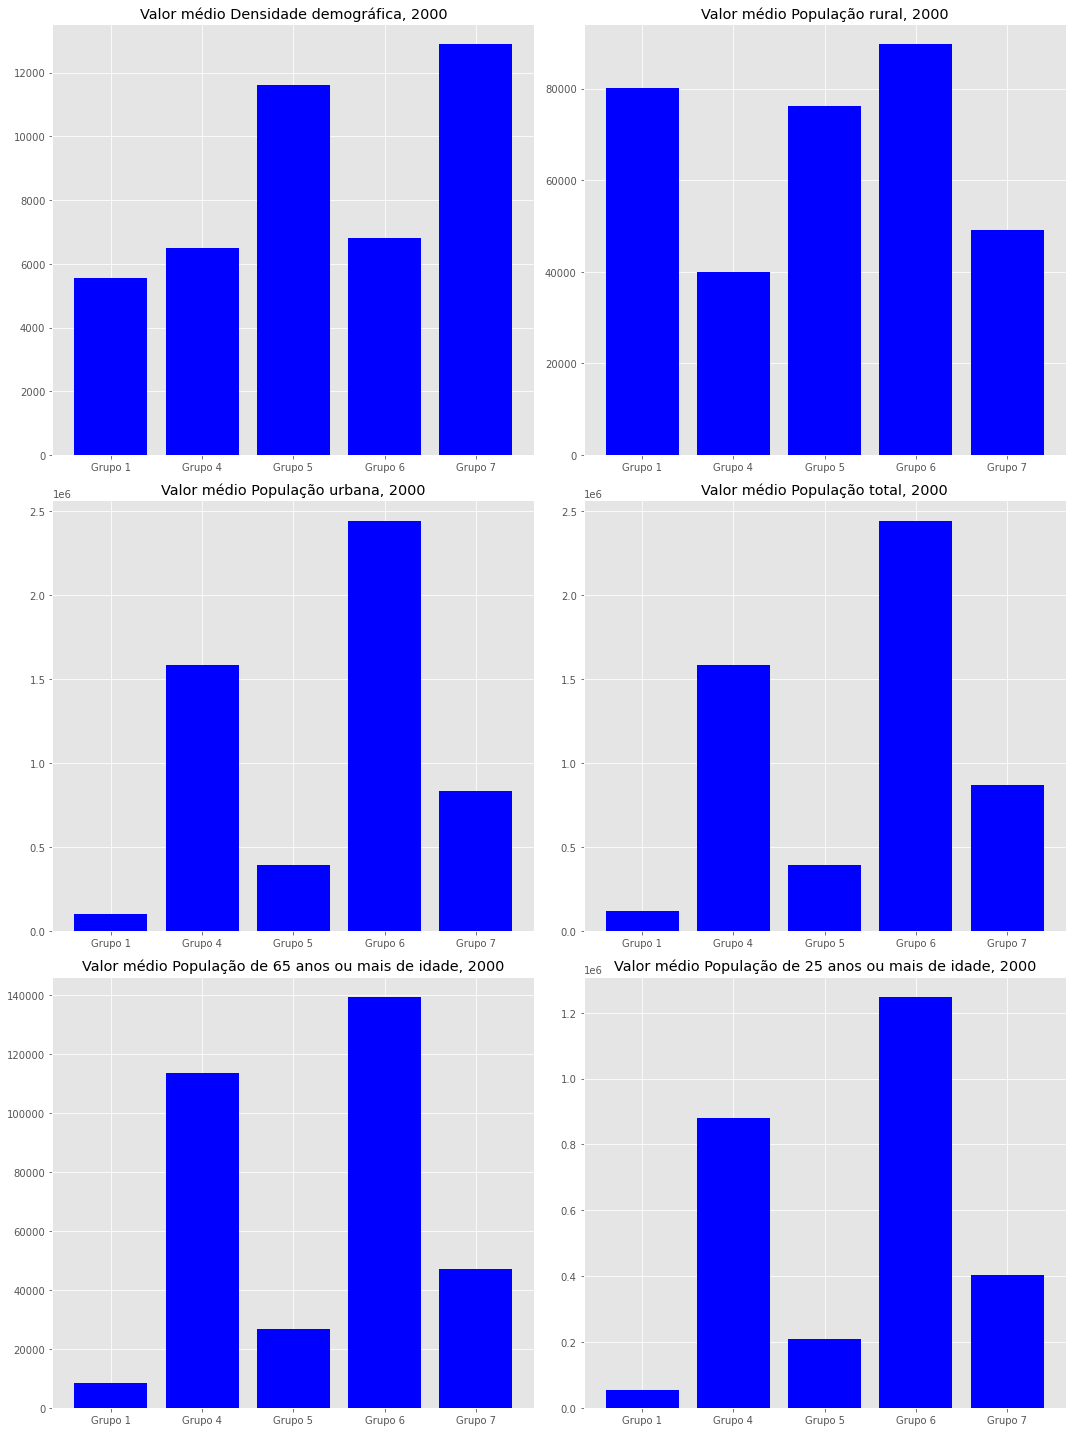

In [10]:
# Análise DemoGráfica
columns = ['Densidade demográfica, 2000',
           'População rural, 2000',
           'População urbana, 2000',
           'População total, 2000',
           'População de 65 anos ou mais de idade, 2000',
           'População de 25 anos ou mais de idade, 2000']

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(15)


for i, col in enumerate(columns):
    
    plt.subplot(3,2,i+1)
    x = df_analyses.groupby('Grupo')[col].max()
    
    plt.title(f'Valor médio {col}')
    plt.bar(x.index, x, color='blue')
    
fig.tight_layout()
plt.show()

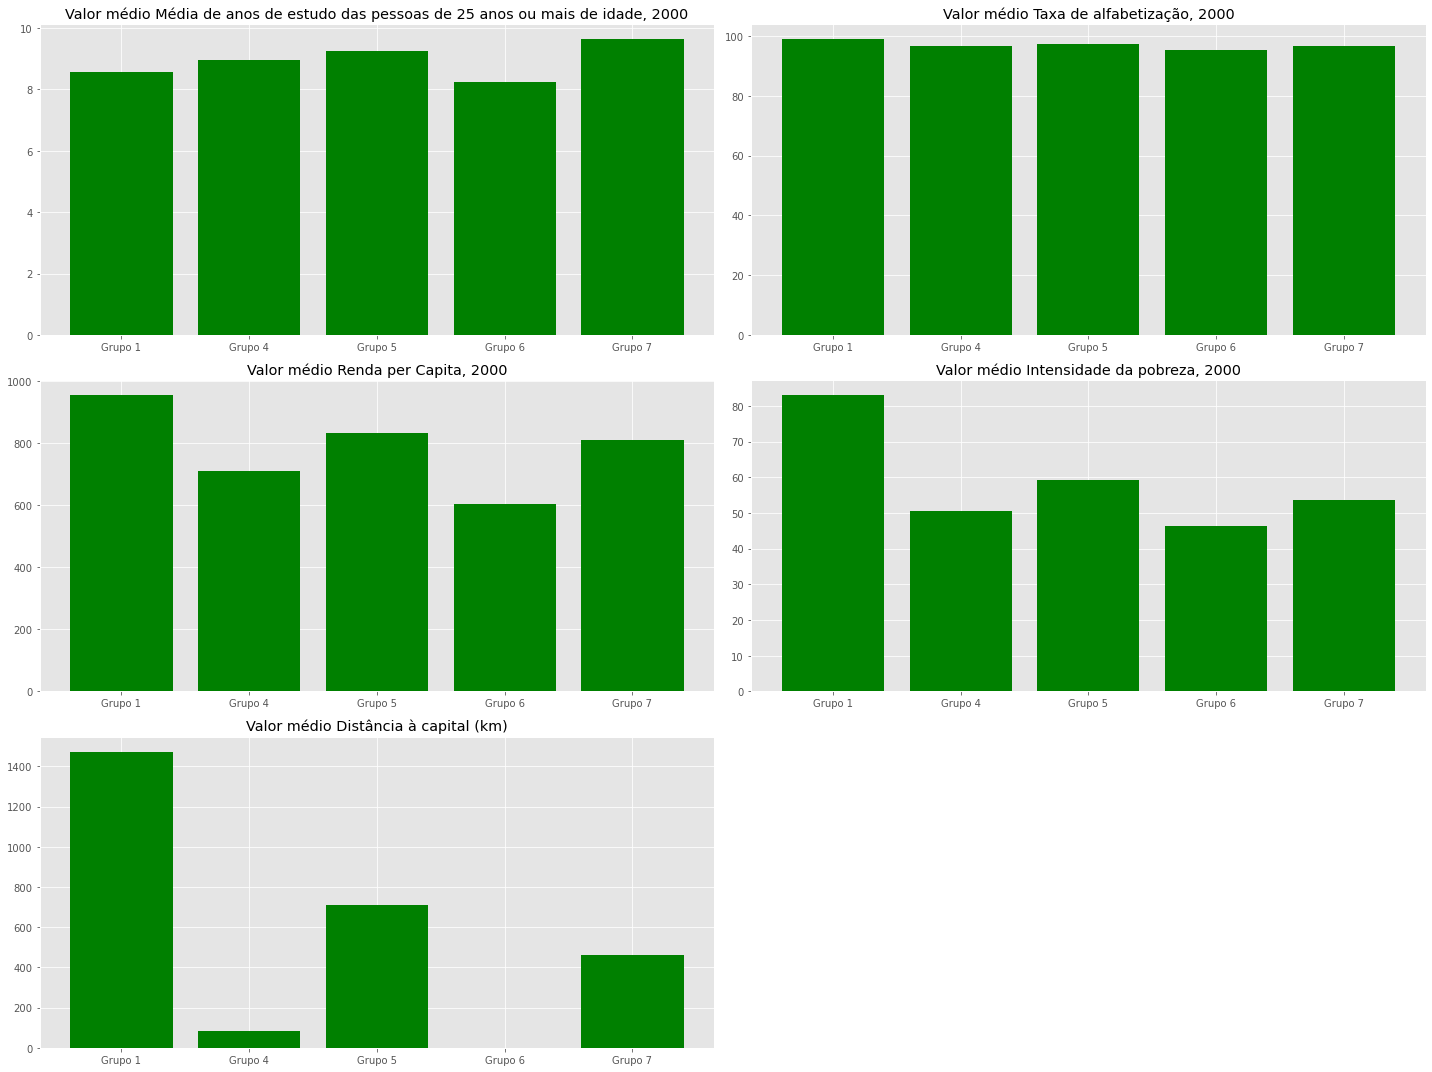

In [11]:
# Análise de Desenvolvimento
columns = ['Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000',
           'Taxa de alfabetização, 2000',
           'Renda per Capita, 2000',
           'Intensidade da pobreza, 2000',
           'Distância à capital (km)']

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)


for i, col in enumerate(columns):
    
    plt.subplot(3,2,i+1)
    x = df_analyses.groupby('Grupo')[col].max()
    
    plt.title(f'Valor médio {col}')
    plt.bar(x.index, x, color='green')
    
fig.tight_layout()
plt.show()

#### Caracterização dos grupos

###### Grupo 1
- Cidades com menor densidade demográfica
- Maior parte da população é Rural
- Cidades mais distantes da capital
- Renda per Capita elevada em relação aos outro grupos
- Maior intensidade de pobreza

###### Grupo 4
- Cidades com menor densidade demográfica
- Distribuição equilibrada entre população rural e população urbana
- Cidades mais próximas da capital
- Renda per Capita baixa em relação aos outro grupos
- intensidade de pobreza  baixa em relação aos outro grupos

##### Grupo 5
- Cidades densidade demográfica eleveda em relação aos outros grupos
- Maior parte da população é Rural
- Cidades consideravelmente distantes da capital
- Renda per Capita elevada em relação aos outro grupos
- intensidade de pobreza  mediana em relação aos outro grupos

##### Grupo 6
- Cidades densidade demográfica baixa porém populosas
- Distribuição equilibrada entre população rural e população urbana
- Grupo composto por algumas capitais e cidades satélites
- Menor renda per Capita em relação aos outros grupos
- Menor intensidade de pobreza em relação aos outro grupos

##### Grupo 7
- Cidades com maior densidade demográfica entre os grupos
- População predominantemente rural
- Cidades pouco distantes da capital
- Renda per Capita mediana em relação aos outros grupos
- intensidade de pobreza  baixa em relação aos outro grupos

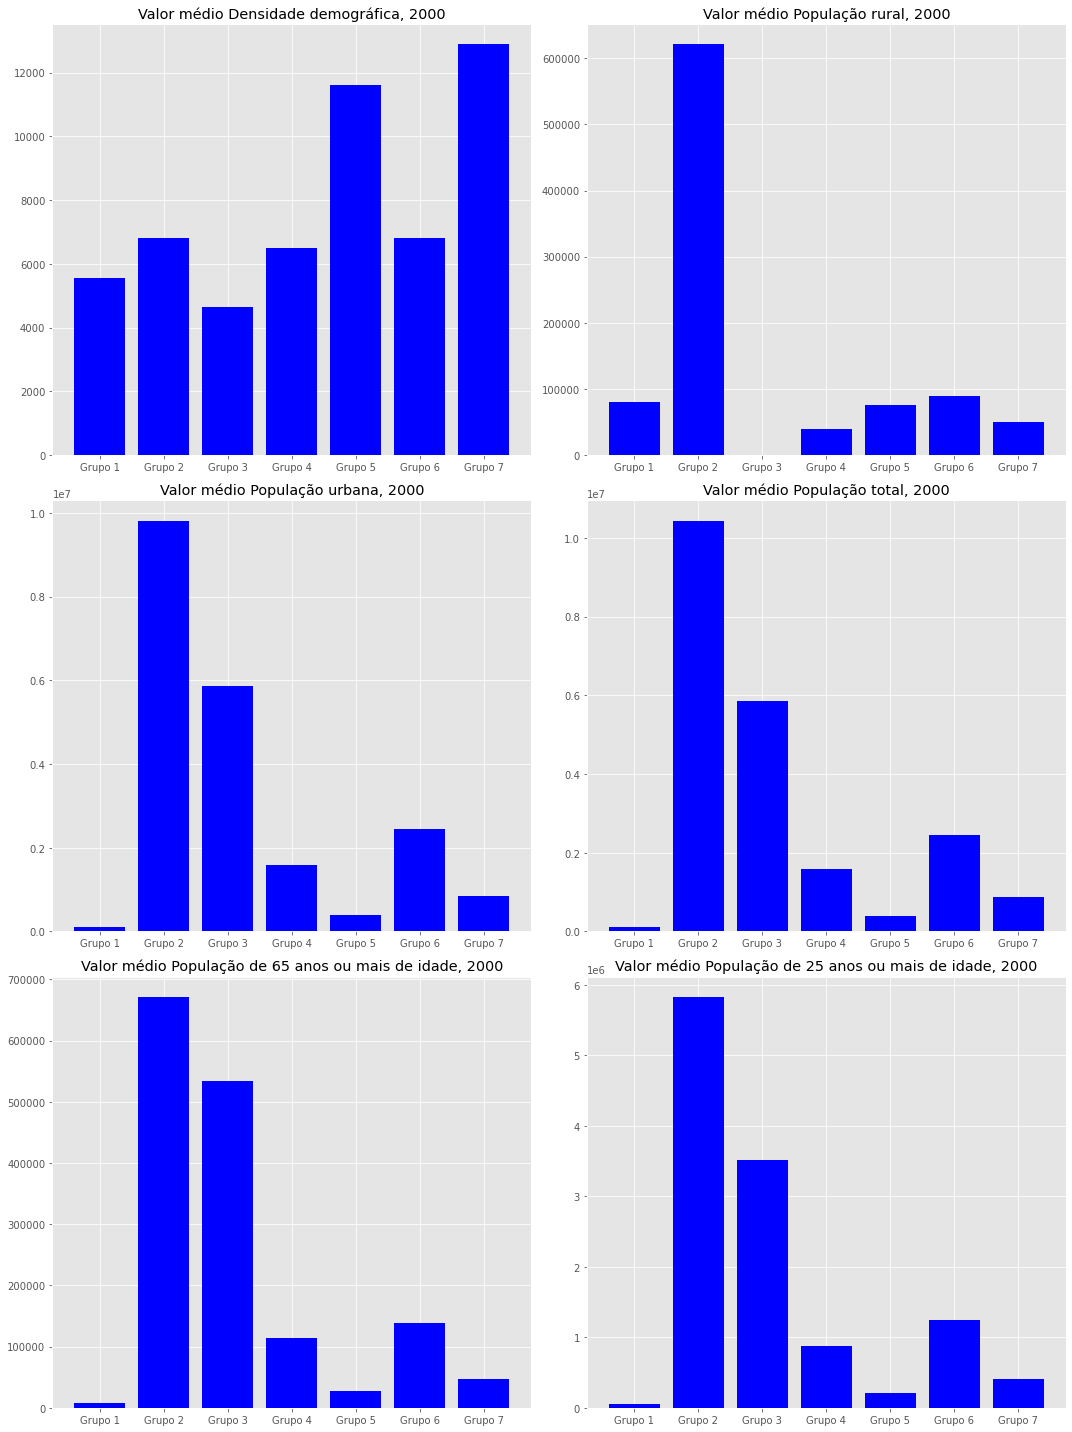

In [12]:
# Análise DemoGráfica
columns = ['Densidade demográfica, 2000',
           'População rural, 2000',
           'População urbana, 2000',
           'População total, 2000',
           'População de 65 anos ou mais de idade, 2000',
           'População de 25 anos ou mais de idade, 2000']

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(15)


for i, col in enumerate(columns):
    
    plt.subplot(3,2,i+1)
    x = df.groupby('Grupo')[col].max()
    
    plt.title(f'Valor médio {col}')
    plt.bar(x.index, x, color='blue')
    
fig.tight_layout()
plt.show()

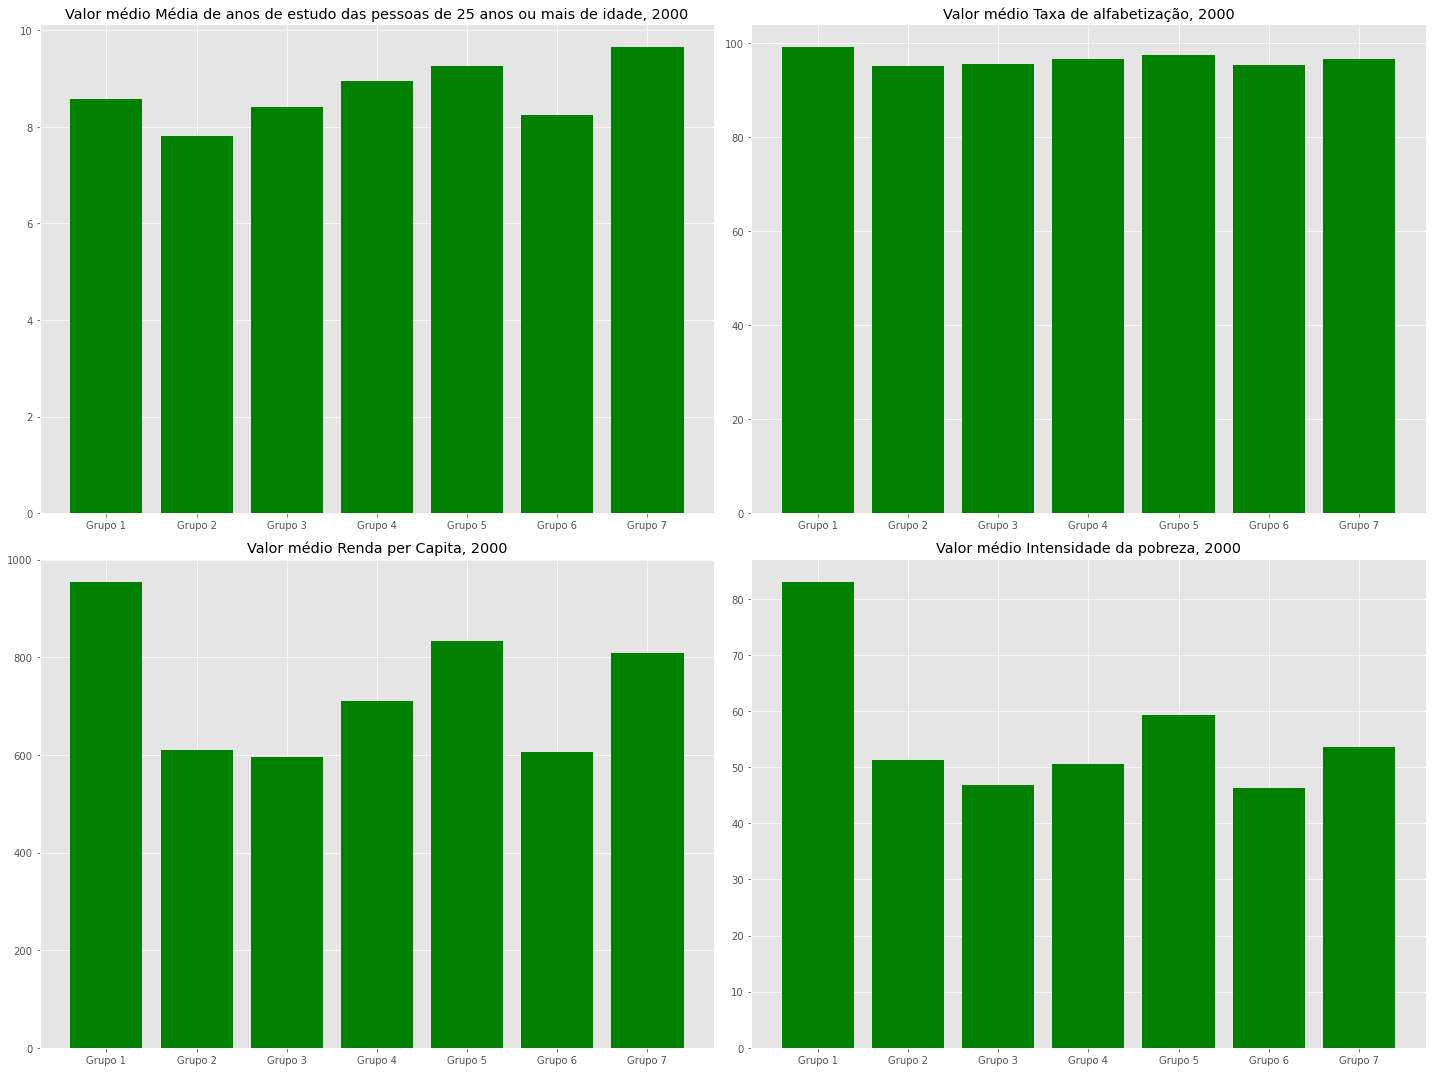

In [15]:
# Análise de Desenvolvimento
columns = ['Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000',
           'Taxa de alfabetização, 2000',
           'Renda per Capita, 2000',
           'Intensidade da pobreza, 2000']

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)


for i, col in enumerate(columns):
    
    plt.subplot(2,2,i+1)
    x = df.groupby('Grupo')[col].max()
    
    plt.title(f'Valor médio {col}')
    plt.bar(x.index, x, color='green')
    
fig.tight_layout()
plt.show()